In [2]:
import numpy as np
import pandas as pd
import imageio
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
# import cv2
import os 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

keras = tf.keras


In [78]:
im = imageio.imread('data/archive/8863/1/8863_idx5_x1001_y801_class1.png')
print(im.shape)

(50, 50, 3)


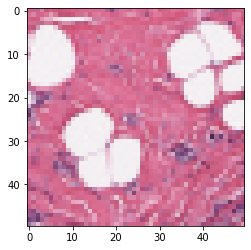

In [79]:
plt.imshow(im)

In [80]:
raw_image = tf.io.read_file('data/archive/8863/1/8863_idx5_x1001_y801_class1.png')
image = tf.image.decode_png(raw_image, channels=3)
image.shape

TensorShape([50, 50, 3])

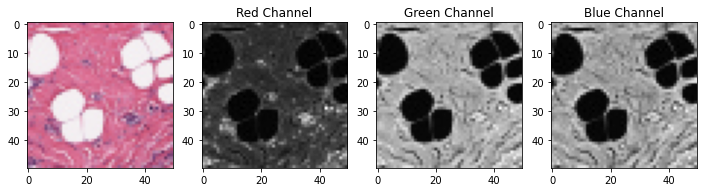

In [25]:
fig, axs = plt.subplots(1, 4, figsize=(12, 8))

axs[0].imshow(image)
axs[0].grid(False)
for i in range(1, 4):
    axs[i].imshow(image[:, :, i-1], cmap=plt.cm.gray_r)
    axs[i].set_title("{} Channel".format(["Red", "Green", "Blue"][i-1]))



In [26]:
raw_image_2 = tf.io.read_file('data/archive/8863/0/8863_idx5_x2701_y1601_class0.png')
image2 = tf.image.decode_png(raw_image_2, channels=0)

In [27]:
image2.shape

TensorShape([50, 50, 3])

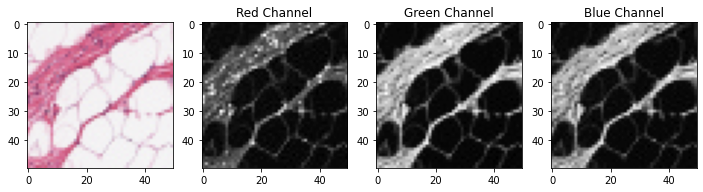

In [28]:
fig, axs = plt.subplots(1, 4, figsize=(12, 8))

axs[0].imshow(image2)
axs[0].grid(False)
for i in range(1, 4):
    axs[i].imshow(image2[:, :, i-1], cmap=plt.cm.gray_r)
    axs[i].set_title("{} Channel".format(["Red", "Green", "Blue"][i-1]))

Create a mini data set - IDC

In [44]:
#setting the path to the directory containing the pics
path_idc = 'data/archive/idc'

In [45]:
idc_data = []
counter = 0
for img in os.listdir(path_idc):
    pc = tf.io.read_file(os.path.join(path_idc,img))
    pic = tf.image.decode_png(pc, channels=3)

    idc_data.append(image)
    
    counter +=1
    if counter > 19:
        break

In [46]:
len(idc_data)

20

In [47]:
idc_data[0]

<tf.Tensor: shape=(50, 50, 3), dtype=uint8, numpy=
array([[[209, 101, 135],
        [206,  99, 142],
        [194, 103, 142],
        ...,
        [207,  91, 127],
        [211, 104, 141],
        [205, 106, 144]],

       [[213, 114, 144],
        [210, 136, 170],
        [209, 101, 140],
        ...,
        [219, 123, 157],
        [216, 126, 163],
        [206,  97, 136]],

       [[209, 101, 136],
        [212,  91, 122],
        [206,  97, 127],
        ...,
        [221, 124, 160],
        [218, 112, 147],
        [206,  84, 121]],

       ...,

       [[147,  94, 137],
        [149,  88, 135],
        [114,  70, 121],
        ...,
        [186,  97, 140],
        [187, 123, 157],
        [172, 121, 158]],

       [[120,  67, 120],
        [138,  85, 134],
        [103,  60, 107],
        ...,
        [202, 150, 173],
        [177, 135, 170],
        [169,  72, 111]],

       [[150, 118, 146],
        [188, 154, 190],
        [224, 194, 213],
        ...,
        [166,  70, 114]

In [48]:
type(idc_data[0])

tensorflow.python.framework.ops.EagerTensor

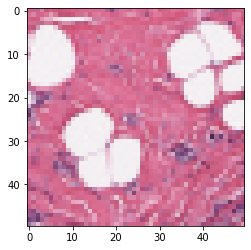

In [49]:
plt.imshow(idc_data[0])

Mini data set - Non IDC

In [50]:
path_non = 'data/archive/non_idc'

In [51]:
non_data = []
counter = 0
for img in os.listdir(path_non):
    
    pc = tf.io.read_file(os.path.join(path_non,img))
    pic = tf.image.decode_png(pc, channels=3)

    non_data.append(pic)
    
    counter +=1
    if counter > 19:
        break

In [52]:
len(non_data)

20

In [53]:
type(non_data[0])

tensorflow.python.framework.ops.EagerTensor

Create data frame from lists

In [39]:
idc_df = pd.DataFrame(data=idc_data)

ValueError: Must pass 2-d input. shape=(50, 50, 50, 3)

In [ ]:
# idc_df['invasive']=1 
# non_df['invasive']=0

Creating the data set

In [54]:
data_set = idc_data + non_data

In [55]:
len(data_set)

40

In [56]:
data_array = np.array(data_set)

In [57]:
data_array.shape

(40, 50, 50, 3)

In [23]:
data_array[0]

<tf.Tensor: shape=(50, 50, 3), dtype=uint8, numpy=
array([[[209, 101, 135],
        [206,  99, 142],
        [194, 103, 142],
        ...,
        [207,  91, 127],
        [211, 104, 141],
        [205, 106, 144]],

       [[213, 114, 144],
        [210, 136, 170],
        [209, 101, 140],
        ...,
        [219, 123, 157],
        [216, 126, 163],
        [206,  97, 136]],

       [[209, 101, 136],
        [212,  91, 122],
        [206,  97, 127],
        ...,
        [221, 124, 160],
        [218, 112, 147],
        [206,  84, 121]],

       ...,

       [[147,  94, 137],
        [149,  88, 135],
        [114,  70, 121],
        ...,
        [186,  97, 140],
        [187, 123, 157],
        [172, 121, 158]],

       [[120,  67, 120],
        [138,  85, 134],
        [103,  60, 107],
        ...,
        [202, 150, 173],
        [177, 135, 170],
        [169,  72, 111]],

       [[150, 118, 146],
        [188, 154, 190],
        [224, 194, 213],
        ...,
        [166,  70, 114]

In [58]:
# create y-column for the data set
y = np.zeros((40))
y[20:] = 1
y.shape

(40,)

In [59]:
# check for correct number of outcomes in y
np.sum(y)

20.0

In [60]:
# train-test split
X = data_array
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=4, shuffle=True)

In [61]:
len(X_train)

28

In [62]:
np.sum(y_train)

14.0

Beginning of the model

In [63]:
model = keras.Sequential()
#add model layers
model.add(layers.Conv2D(64, kernel_size=3, activation='relu', input_shape=(50,50,3)))
# model.add(layers.Conv2D(32, kernel_size=3, activation='relu'))
# model.add(layers.Flatten())
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(1, 1), padding='valid'))
model.add(layers.Dense(10, activation='softmax'))

In [64]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [65]:
# need something that allows the shape to be the same. How?
#train the model
model.fit(X_test, y_test, epochs=3)

Epoch 1/3


ValueError: in user code:

    /home/shredder/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:806 train_function  *
        return step_function(self, iterator)
    /home/shredder/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /home/shredder/anaconda3/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /home/shredder/anaconda3/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /home/shredder/anaconda3/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    /home/shredder/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:789 run_step  **
        outputs = model.train_step(data)
    /home/shredder/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:749 train_step
        y, y_pred, sample_weight, regularization_losses=self.losses)
    /home/shredder/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/compile_utils.py:204 __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    /home/shredder/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/losses.py:149 __call__
        losses = ag_call(y_true, y_pred)
    /home/shredder/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/losses.py:253 call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    /home/shredder/anaconda3/lib/python3.7/site-packages/tensorflow/python/util/dispatch.py:201 wrapper
        return target(*args, **kwargs)
    /home/shredder/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/losses.py:1535 categorical_crossentropy
        return K.categorical_crossentropy(y_true, y_pred, from_logits=from_logits)
    /home/shredder/anaconda3/lib/python3.7/site-packages/tensorflow/python/util/dispatch.py:201 wrapper
        return target(*args, **kwargs)
    /home/shredder/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/backend.py:4687 categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)
    /home/shredder/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/tensor_shape.py:1134 assert_is_compatible_with
        raise ValueError("Shapes %s and %s are incompatible" % (self, other))

    ValueError: Shapes (None, 1) and (None, 47, 47, 10) are incompatible


Want to do at least 1 iteration of convolution, with an activation function (that looks built into the conv in keras)
And a layer of pooling.
Softmax is final activation layer
    # available activation functions at:
    # https://keras.io/activations/
    # https://en.wikipedia.org/wiki/Activation_function
    # options: 'linear', 'sigmoid', 'tanh', 'relu', 'softplus', 'softsign'

In [ ]:

#reshape data to fit model
X_train = image.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

In [ ]:
# potential way to create y columns
from keras.utils import to_categorical#one-hot encode target column
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)y_train[0]

In [ ]:
#compile model using accuracy to measure model performance
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#train the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3)

In [ ]:
#actual results for first 4 images in test set
y_test[:4]

Analyzing the model - confusion matrix

After running the model should have a value for y-predicted (y-pred) from x values in x_test.
Can compare that against a true y-value (y_test) to get a confusion matrix

Remember that the sklearn confusion matrix is in a slightly different order
tn, fp, fn, tp = confusion_matrix([0, 1, 0, 1], [1, 1, 1, 0]).ravel()
(tn, fp, fn, tp)

**Method 1**

In [39]:
directory = 'data/archive'
ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory,
    labels="inferred",
#     label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(50, 50),
    shuffle=True,
    seed=56,
    validation_split=.2,
    subset='validation',
    interpolation="bilinear",
    follow_links=False,
)


Found 277524 files belonging to 2 classes.
Using 55504 files for validation.


In [41]:
class_names = ds.class_names
print(class_names)

['idc', 'non_idc']


In [42]:
for images, labels in ds:
    print(images.shape)
    print(labels.shape)
    break

(32, 50, 50, 3)
(32,)


**Method 2**

In [ ]:
directory = 'data/archive'

In [47]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  directory,
  validation_split=0.2,
  subset="training",
  seed=78,
  image_size=(50,50),
  batch_size=32)

Found 277524 files belonging to 2 classes.
Using 222020 files for training.


In [60]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  directory,
  validation_split=0.2,
  subset="validation",
  seed=78,
  image_size=(50, 50),
  batch_size=32)


Found 277524 files belonging to 2 classes.
Using 55504 files for validation.


In [61]:
train_class_names = train_ds.class_names
print(train_class_names)

['idc', 'non_idc']


In [62]:
val_class_names = val_ds.class_names
print(val_class_names)

['idc', 'non_idc']


In [43]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator()


In [44]:
train_it = datagen.flow_from_directory(
    'data/archive',
    target_size=(50, 50),
    batch_size=64,
    class_mode='binary')

Found 277524 images belonging to 2 classes.


In [45]:
len(train_it)

4337

In [64]:
num_classes = 2

model = tf.keras.Sequential([
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])


In [65]:
model.compile(
  optimizer='adam',
#   loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  loss='categorical_crossentropy',
  metrics=['accuracy'])




In [66]:
model_1 = model.fit(train_ds,validation_data=val_ds, epochs=5)


Epoch 1/5
6939/6939 [==============================] - 345s 50ms/step - loss: 0.3867 - accuracy: 0.8327 - val_loss: 0.4041 - val_accuracy: 0.8206
Epoch 2/5
6939/6939 [==============================] - 324s 47ms/step - loss: 0.3436 - accuracy: 0.8536 - val_loss: 0.3234 - val_accuracy: 0.8649
Epoch 3/5
6939/6939 [==============================] - 307s 44ms/step - loss: 0.3280 - accuracy: 0.8613 - val_loss: 0.3194 - val_accuracy: 0.8667
Epoch 4/5
6939/6939 [==============================] - 329s 47ms/step - loss: 0.3227 - accuracy: 0.8635 - val_loss: 0.3234 - val_accuracy: 0.8617
Epoch 5/5
6939/6939 [==============================] - 362s 52ms/step - loss: 0.3175 - accuracy: 0.8660 - val_loss: 0.3417 - val_accuracy: 0.8568


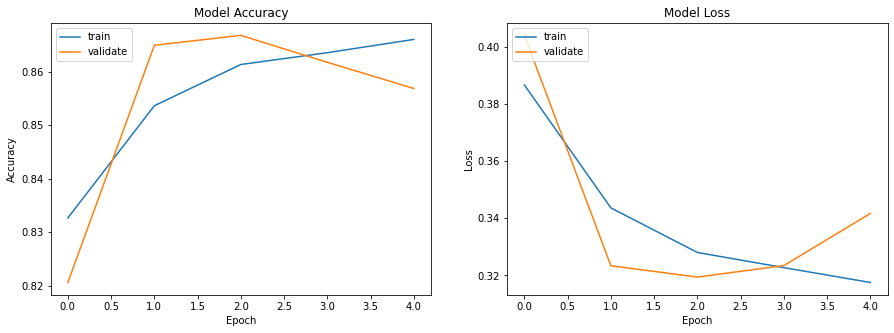

In [71]:
def plotmodelhistory(history): 
    fig, axs = plt.subplots(1,2,figsize=(15,5)) 
    # summarize history for accuracy
    axs[0].plot(history.history['accuracy']) 
    axs[0].plot(history.history['val_accuracy']) 
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy') 
    axs[0].set_xlabel('Epoch')
    axs[0].legend(['train', 'validate'], loc='upper left')
    # summarize history for loss
    axs[1].plot(history.history['loss']) 
    axs[1].plot(history.history['val_loss']) 
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss') 
    axs[1].set_xlabel('Epoch')
    axs[1].legend(['train', 'validate'], loc='upper left')
    plt.show()

# list all data in history
# print(history.history.keys())

plotmodelhistory(model_1) 

**Method 3**

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator()


In [10]:
train_it = datagen.flow_from_directory(
    'data/archive',
    target_size=(50, 50),
    batch_size=64,
    class_mode='binary')

Found 277524 images belonging to 2 classes.


In [7]:
len(train_it)

4337

In [11]:
type(train_it)

tensorflow.python.keras.preprocessing.image.DirectoryIterator

In [13]:
print(train_it)

More models

In [72]:
num_classes = 2

model2 = tf.keras.Sequential([
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])


In [73]:
model2.compile(
  optimizer='adam',
  loss='SparseCategoricalCrossentropy',
  metrics=['accuracy'])

In [74]:
model_2 = model2.fit(train_ds,validation_data=val_ds, epochs=5)

Epoch 1/5
6939/6939 [==============================] - 286s 41ms/step - loss: 11.5405 - accuracy: 0.2840 - val_loss: 11.5205 - val_accuracy: 0.2852
Epoch 2/5
6939/6939 [==============================] - 306s 44ms/step - loss: 11.5422 - accuracy: 0.2839 - val_loss: 11.5205 - val_accuracy: 0.2852
Epoch 3/5
6939/6939 [==============================] - 288s 41ms/step - loss: 11.5421 - accuracy: 0.2839 - val_loss: 11.5205 - val_accuracy: 0.2852
Epoch 4/5
6939/6939 [==============================] - 300s 43ms/step - loss: 11.5422 - accuracy: 0.2839 - val_loss: 11.5205 - val_accuracy: 0.2852
Epoch 5/5
6939/6939 [==============================] - 298s 43ms/step - loss: 11.5421 - accuracy: 0.2839 - val_loss: 11.5205 - val_accuracy: 0.2852


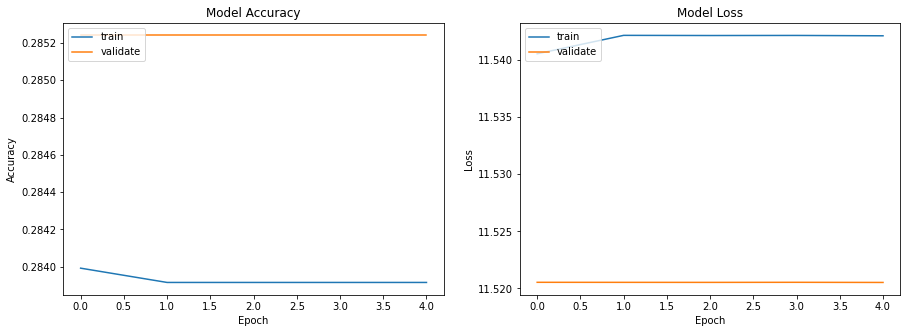

In [75]:
plotmodelhistory(model_2) 

In [82]:
num_classes = 2

model3 = tf.keras.Sequential([
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='softmax'),
  layers.Dense(num_classes)
])

In [83]:
model3.compile(
  optimizer='adam',
  loss='SparseCategoricalCrossentropy',
  metrics=['accuracy'])

In [84]:
model_3 = model3.fit(train_ds,validation_data=val_ds, epochs=5)

Epoch 1/5
6939/6939 [==============================] - 374s 54ms/step - loss: 0.6932 - accuracy: 0.7160 - val_loss: 0.6932 - val_accuracy: 0.7148
Epoch 2/5
6939/6939 [==============================] - 386s 56ms/step - loss: 0.6932 - accuracy: 0.7161 - val_loss: 0.6932 - val_accuracy: 0.7148
Epoch 3/5
6939/6939 [==============================] - 372s 54ms/step - loss: 0.6932 - accuracy: 0.7161 - val_loss: 0.6932 - val_accuracy: 0.7148
Epoch 4/5
6939/6939 [==============================] - 328s 47ms/step - loss: 0.6932 - accuracy: 0.7161 - val_loss: 0.6932 - val_accuracy: 0.7148
Epoch 5/5
6939/6939 [==============================] - 330s 48ms/step - loss: 0.6932 - accuracy: 0.7161 - val_loss: 0.6932 - val_accuracy: 0.7148


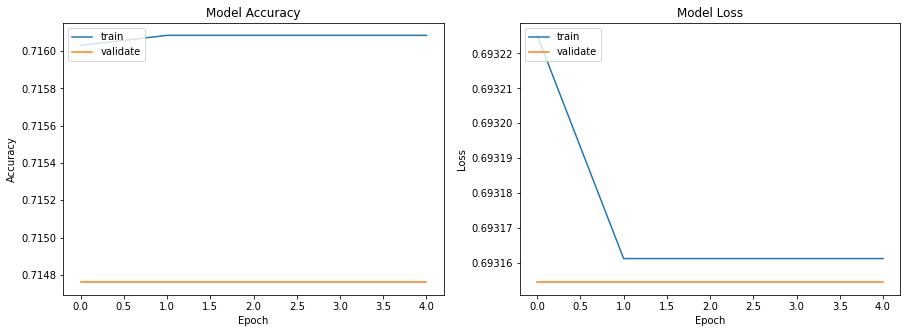

In [85]:
plotmodelhistory(model_3) 

In [ ]:
y_pred = model_3.predict(val_ds)